<a href="https://colab.research.google.com/github/senthilv83/Hybrid-Quantum-Cirq-Genomics-KG-Model/blob/main/RealData_Gene_KG_CirqQuantum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy==1.23.0 pandas==1.5.0
!pip install cirq torch scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 63.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 72.5 MB/s eta 0:00:00
  Created wheel for numpy: filename=numpy-1.23.0-cp311-cp311-linux_x86_64.whl size=19730301 sha256=a1d9773b10b1c15eaa09528a7df5a25c7b47b9e9883f2f68bc43b06fa6c33a00
  Stored in directory: /root/.cache/pip/wheels/6d/36/1a/3ec6b85008bea3151efb003f5d41baa7bf4966cb43c1c2470b
Successfully built numpy
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed.

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.0
    Uninstalling numpy-1.23.0:
      Successfully uninstalled numpy-1.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.0 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.0 which is incompatible.
dask-expr 1.1.21 requires pandas>=2, but you have pandas 1.5.0 which is incompatible.
xarray 2025.1.2 requires pandas>=2.1, but you have pandas 1.5.0 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.0 which is incompatible.
bigfram

In [ ]:
# EDA

In [ ]:
import pandas as pd

try:
    df = pd.read_csv('/content/sample_data/GenomicSequenceData.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'GenomicSequenceData.csv' not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Unable to parse the CSV file. Please check the file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,Class,id,Sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...


In [ ]:
if df is not None:
    df['Sequence'] = df['Sequence'].str.replace(r'\\t', '', regex=True)
    df['Sequence'] = df['Sequence'].str.replace(r'\\', '', regex=True)
    display(df.head())

,Class,id,Sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...


In [ ]:
if df is not None:
    df['Sequence'] = df['Sequence'].str.lstrip()
    df['Sequence'] = df['Sequence'].str.replace(r'\\t', '', regex=True)
    df['Sequence'] = df['Sequence'].str.replace(r'\\', '', regex=True)
    display(df.head())
    # Basic exploratory data analysis
    print(df.info())
    print(df.describe(include='all'))
    print(df['Class'].value_counts())
    #Further exploration can be done here, but it's beyond the scope of the current subtask

,Class,id,Sequence
0,+,S10,tactagcaatacgcttgcgttcggtggttaagtatgtataatgcgc...
1,+,AMPC,tgctatcctgacagttgtcacgctgattggtgtcgttacaatctaa...
2,+,AROH,gtactagagaactagtgcattagcttatttttttgttatcatgcta...
3,+,DEOP2,aattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaata...
4,+,LEU1_TRNA,tcgataattaactattgacgaaaagctgaaaaccactagaatgcgc...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     106 non-null    object
 1   id        106 non-null    object
 2   Sequence  106 non-null    object
dtypes: object(3)
memory usage: 2.6+ KB
None
       Class   id                                           Sequence
count    106  106                                                106
unique     2  106                                                106
top        +  S10  tactagcaatacgcttgcgttcggtggttaagtatgtataatgcgc...
freq      53    1                                                  1
+    53
-    53
Name: Class, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu

# 1. Calculate sequence lengths
df['Sequence_Length'] = df['Sequence'].str.len()

# 2. Analyze sequence length distribution for each class
positive_class = df[df['Class'] == '+']
negative_class = df[df['Class'] == '-']

print("Positive Class Sequence Length Statistics:")
print(positive_class['Sequence_Length'].describe())
print("\nNegative Class Sequence Length Statistics:")
print(negative_class['Sequence_Length'].describe())


# 3. Statistical tests
# Check for normality (optional)
# ... (If you want to check for normality before proceeding with t-test or Mann-Whitney U test)

# Perform t-test or Mann-Whitney U test
t_statistic, p_value = ttest_ind(positive_class['Sequence_Length'], negative_class['Sequence_Length'])
print(f"\nT-test Results: t-statistic={t_statistic:.2f}, p-value={p_value:.3f}")

u_statistic, p_value_u = mannwhitneyu(positive_class['Sequence_Length'], negative_class['Sequence_Length'])
print(f"\nMann-Whitney U test Results: U-statistic={u_statistic:.2f}, p-value={p_value_u:.3f}")


# 4. Sequence composition analysis
def nucleotide_frequency(sequence):
    a_count = sequence.count('A')
    t_count = sequence.count('T')
    g_count = sequence.count('G')
    c_count = sequence.count('C')
    total = len(sequence)
    return a_count / total, t_count / total, g_count / total, c_count / total

positive_class[['A', 'T', 'G', 'C']] = positive_class['Sequence'].apply(nucleotide_frequency).apply(pd.Series)
negative_class[['A', 'T', 'G', 'C']] = negative_class['Sequence'].apply(nucleotide_frequency).apply(pd.Series)

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(positive_class['Sequence_Length'], color='skyblue', label='+', kde=True)
sns.histplot(negative_class['Sequence_Length'], color='salmon', label='-', kde=True)
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.title("Sequence Length Distribution")
plt.legend()

plt.subplot(1, 2, 2)
nucleotide_cols = ['A', 'T', 'G', 'C']
positive_means = positive_class[nucleotide_cols].mean()
negative_means = negative_class[nucleotide_cols].mean()
width = 0.35
x = range(len(nucleotide_cols))
plt.bar([i - width/2 for i in x], positive_means, width, label='+', color='skyblue')
plt.bar([i + width/2 for i in x], negative_means, width, label='-', color='salmon')
plt.xticks(x, nucleotide_cols)
plt.ylabel("Relative Frequency")
plt.title("Nucleotide Frequencies")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu

# 1. Calculate sequence lengths
df['Sequence_Length'] = df['Sequence'].str.len()

# 2. Analyze sequence length distribution for each class
positive_class = df[df['Class'] == '+']
negative_class = df[df['Class'] == '-']

print("Positive Class Sequence Length Statistics:")
print(positive_class['Sequence_Length'].describe())
print("\nNegative Class Sequence Length Statistics:")
print(negative_class['Sequence_Length'].describe())

# 3. Statistical tests
# Perform t-test or Mann-Whitney U test
# Since all sequence lengths are identical, t-test will fail. Use Mann-Whitney U test.
u_statistic, p_value_u = mannwhitneyu(positive_class['Sequence_Length'], negative_class['Sequence_Length'])
print(f"\nMann-Whitney U test Results: U-statistic={u_statistic:.2f}, p-value={p_value_u:.3f}")


# 4. Sequence composition analysis
def nucleotide_frequency(sequence):
    a_count = sequence.count('A')
    t_count = sequence.count('T')
    g_count = sequence.count('G')
    c_count = sequence.count('C')
    total = len(sequence)
    return a_count / total, t_count / total, g_count / total, c_count / total

# Correctly apply the function using .loc
positive_class.loc[:, ['A', 'T', 'G', 'C']] = positive_class['Sequence'].apply(nucleotide_frequency).apply(pd.Series)
negative_class.loc[:, ['A', 'T', 'G', 'C']] = negative_class['Sequence'].apply(nucleotide_frequency).apply(pd.Series)


# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(positive_class['Sequence_Length'], color='skyblue', label='+', kde=True)
sns.histplot(negative_class['Sequence_Length'], color='salmon', label='-', kde=True)
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.title("Sequence Length Distribution")
plt.legend()

plt.subplot(1, 2, 2)
nucleotide_cols = ['A', 'T', 'G', 'C']
positive_means = positive_class[nucleotide_cols].mean()
negative_means = negative_class[nucleotide_cols].mean()

width = 0.35
x = range(len(nucleotide_cols))
plt.bar([i - width/2 for i in x], positive_means, width, label='+', color='skyblue')
plt.bar([i + width/2 for i in x], negative_means, width, label='-', color='salmon')
plt.xticks(x, nucleotide_cols)
plt.ylabel("Relative Frequency")
plt.title("Nucleotide Frequencies")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 8))

# Subplot 1: Sequence Length Distribution
plt.subplot(1, 2, 1)
sns.boxplot(x='Class', y='Sequence_Length', data=df, palette={'+': 'skyblue', '-': 'salmon'})
plt.xlabel("Class")
plt.ylabel("Sequence Length")
plt.title("Sequence Length Distribution by Class")


# Subplot 2: Nucleotide Frequencies
plt.subplot(1, 2, 2)
nucleotide_cols = ['A', 'T', 'G', 'C']
positive_means = positive_class[nucleotide_cols].mean()
negative_means = negative_class[nucleotide_cols].mean()

width = 0.35
x = range(len(nucleotide_cols))
plt.bar([i - width/2 for i in x], positive_means, width, label='+', color='skyblue')
plt.bar([i + width/2 for i in x], negative_means, width, label='-', color='salmon')
plt.xticks(x, nucleotide_cols)
plt.ylabel("Relative Frequency")
plt.title("Nucleotide Frequencies by Class")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from collections import Counter
import pandas as pd

def kmer_frequency(sequence, k):
    """Calculates the frequency of k-mers in a sequence."""
    kmers = [sequence[i:i + k] for i in range(len(sequence) - k + 1)]
    kmer_counts = Counter(kmers)
    return kmer_counts

# Get the minimum sequence length to determine the maximum k
min_seq_len = df['Sequence'].str.len().min()

# Calculate k-mer frequencies for k = 3, 4, 5 up to min_seq_len
for k in range(3, min_seq_len + 1):
    # Apply kmer_frequency to each sequence in the DataFrame
    all_kmers = df['Sequence'].apply(lambda seq: kmer_frequency(seq, k)).sum()

    # Get the most frequent k-mers
    top_kmers = all_kmers.most_common(10)  # Get top 10 for example

    print(f"Top 10 most frequent {k}-mers:")
    for kmer, freq in top_kmers:
        print(f"- {kmer}: {freq}")
    print("-" * 20)  # Separator between k values

In [ ]:
from collections import Counter
import pandas as pd

def kmer_frequency(sequence, k):
    """Calculates the frequency of k-mers in a sequence."""
    kmers = [sequence[i:i + k] for i in range(len(sequence) - k + 1)]
    kmer_counts = Counter(kmers)
    return kmer_counts

# Get the minimum sequence length to determine the maximum k
min_seq_len = df['Sequence'].str.len().min()

# Calculate and display k-mer frequencies for each class
for k in range(3, min_seq_len + 1):
    print(f"Top 10 most frequent {k}-mers by class:")
    for class_label in df['Class'].unique():
        class_sequences = df[df['Class'] == class_label]['Sequence']
        all_kmers = class_sequences.apply(lambda seq: kmer_frequency(seq, k)).sum()
        top_kmers = all_kmers.most_common(10)

        print(f"\nClass: {class_label}")
        for kmer, freq in top_kmers:
            print(f"- {kmer}: {freq}")
    print("-" * 20)

In [ ]:
from collections import Counter
import pandas as pd

def kmer_frequency(sequence, k):
    """Calculates the frequency of k-mers in a sequence."""
    kmers = [sequence[i:i + k] for i in range(len(sequence) - k + 1)]
    kmer_counts = Counter(kmers)
    return kmer_counts

# Get the minimum sequence length to determine the maximum k
min_seq_len = df['Sequence'].str.len().min()

# Calculate and display common k-mers for each k value
for k in range(3, min_seq_len + 1):
    print(f"Common {k}-mers in positive and negative classes:")

    # Get k-mers for positive class
    positive_class_sequences = df[df['Class'] == '+']['Sequence']
    positive_kmers = positive_class_sequences.apply(lambda seq: kmer_frequency(seq, k)).sum()

    # Get k-mers for negative class
    negative_class_sequences = df[df['Class'] == '-']['Sequence']
    negative_kmers = negative_class_sequences.apply(lambda seq: kmer_frequency(seq, k)).sum()

    # Find common k-mers
    common_kmers = set(positive_kmers.keys()) & set(negative_kmers.keys())

    # Print common k-mers and their frequencies
    for kmer in common_kmers:
        print(f"- {kmer}: Positive - {positive_kmers.get(kmer, 0)}, Negative - {negative_kmers.get(kmer, 0)}")

    print("-" * 20)

In [ ]:
# Modelling with Quantum

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import cirq
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# def load_genomics_kg_features(num_samples=200, feature_dim=16, threshold=4.0):
#     """
#     Generate synthetic features and labels with a signal.
#     Label is 1 if the sum of the first half of the features > threshold, else 0.
#     """
#     features = np.random.rand(num_samples, feature_dim).astype(np.float32) * 2  # scale to [0, 2)
#     # Compute sum over first half of features for each sample.
#     signal = np.sum(features[:, :feature_dim//2], axis=1)
#     labels = (signal > threshold).astype(np.int64)
#     features_tensor = torch.tensor(features)
#     labels_tensor = torch.tensor(labels)
#     print(f"Loaded synthetic features with shape: {features_tensor.shape}")
#     print(f"Loaded synthetic labels with shape: {labels_tensor.shape}")
#     return features_tensor, labels_tensor

# # Test synthetic data loader
# features, labels = load_genomics_kg_features()

Loaded synthetic features with shape: torch.Size([200, 16])
Loaded synthetic labels with shape: torch.Size([200])


In [ ]:
# features

tensor([[1.5844, 1.9978, 1.9519,  ..., 1.8942, 1.7773, 1.1099],
        [0.2880, 0.4837, 0.6556,  ..., 0.2617, 1.0921, 0.1722],
        [1.7194, 1.7797, 1.3483,  ..., 1.4477, 1.5846, 1.9657],
        ...,
        [1.7072, 1.9930, 0.3527,  ..., 0.4373, 1.9069, 1.7717],
        [0.8201, 1.7467, 1.4703,  ..., 1.7336, 1.2145, 1.8751],
        [1.8861, 1.1938, 1.8946,  ..., 1.2145, 1.4798, 1.5020]])

In [ ]:
# labels

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
df['Class'] = df['Class'].replace({'+': 1, '-': 0})

In [ ]:
# Define a mapping for the characters
char_map = {'a': 1, 'c': 2, 'g': 3, 't': 4}

# Function to convert a DNA sequence to the comma-separated array
def convert_sequence(seq):
    return ','.join(str(char_map[base]) for base in seq)

# Apply the function to each row in the 'DNA_sequence' column
df['Converted_Sequence'] = df['Sequence'].apply(convert_sequence)

In [ ]:
df['Converted_Sequence']

,Converted_Sequence
0,"4,1,2,4,1,3,2,1,1,4,1,2,3,2,4,4,3,2,3,4,4,2,3,..."
1,"4,3,2,4,1,4,2,2,4,3,1,2,1,3,4,4,3,4,2,1,2,3,2,..."
2,"3,4,1,2,4,1,3,1,3,1,1,2,4,1,3,4,3,2,1,4,4,1,3,..."
3,"1,1,4,4,3,4,3,1,4,3,4,3,4,1,4,2,3,1,1,3,4,3,4,..."
4,"4,2,3,1,4,1,1,4,4,1,1,2,4,1,4,4,3,1,2,3,1,1,1,..."
...,...
101,"2,2,4,2,1,1,4,3,3,2,2,4,2,4,1,1,1,2,3,3,3,4,2,..."
102,"3,4,1,4,4,2,4,2,1,1,2,1,1,3,1,4,4,1,1,2,2,3,1,..."
103,"2,3,2,3,1,2,4,1,2,3,1,4,3,1,3,1,4,3,2,2,4,3,1,..."
104,"2,4,2,3,4,2,2,4,2,1,1,4,3,3,2,2,4,2,4,1,1,1,2,..."


In [ ]:
# Step 1: Convert each row of the 'Converted_Sequence' column into a list of integers
def convert_row_to_list(row):
    return [int(x) for x in row.split(',')]  # Split the string by commas and convert each element to an integer

# Apply the conversion to each row
df['Converted_Sequence_1'] = df['Converted_Sequence'].apply(convert_row_to_list)

# Step 2: Convert the DataFrame column (which contains lists) to a 2D list (array of arrays)
sequence_lists = df['Converted_Sequence_1'].tolist() # If you need this as a 2D list later

In [ ]:
features_tensor = torch.tensor(sequence_lists)
labels_tensor = torch.tensor(df['Class'])

In [ ]:
print(f"Loaded synthetic features with shape: {features_tensor.shape}")
print(f"Loaded synthetic labels with shape: {labels_tensor.shape}")

Loaded synthetic features with shape: torch.Size([106, 57])
Loaded synthetic labels with shape: torch.Size([106])


In [ ]:
def create_quantum_circuit(params):
    """
    Build a simple 2-qubit variational quantum circuit.
    Args:
        params: 1D numpy array of length 4.
    Returns:
        circuit: a Cirq Circuit.
        qubits: list of two Cirq qubits.
    """
    qubits = [cirq.GridQubit(0, i) for i in range(2)]
    circuit = cirq.Circuit()
    # First layer: RX rotations
    for i, q in enumerate(qubits):
        circuit.append(cirq.rx(params[i])(q))
    # Entangling layer: CNOT gate
    circuit.append(cirq.CNOT(qubits[0], qubits[1]))
    # Second layer: RY rotations
    for i, q in enumerate(qubits):
        circuit.append(cirq.ry(params[i+2])(q))
    return circuit, qubits

def simulate_quantum_circuit(params):
    """
    Simulate the circuit and return expectation values in the Z basis.
    """
    circuit, qubits = create_quantum_circuit(params)
    # Add measurement operations
    for i, q in enumerate(qubits):
        circuit.append(cirq.measure(q, key=f'm{i}'))

    print("Standard Quantum Circuit Diagram:")
    print(circuit)

    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=100)

    print("\nMeasurement Results (raw counts):")
    print(result)

    exp_vals = []
    for i in range(len(qubits)):
        measurements = result.measurements[f'm{i}']
        # 0 -> +1, 1 -> -1
        exp_val = np.mean(1 - 2 * measurements)
        exp_vals.append(exp_val)
    print("\nComputed Expectation Values (Z basis):", exp_vals)
    return np.array(exp_vals, dtype=np.float32)

# Demo the standard circuit
print("\n--- Demo: Standard Quantum Circuit ---")
sample_params = np.array([0.1, 0.2, 0.3, 0.4], dtype=np.float32)
_ = simulate_quantum_circuit(sample_params)



--- Demo: Standard Quantum Circuit ---
Standard Quantum Circuit Diagram:
(0, 0): ───Rx(0.032π)───@───Ry(0.095π)───M('m0')───
                        │
(0, 1): ───Rx(0.064π)───X───Ry(0.127π)───M('m1')───

Measurement Results (raw counts):
m0=0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
m1=0000000000000010100001000000101000100000000000000000000000000000000000000000010000000000000000000000

Computed Expectation Values (Z basis): [1.0, 0.86]


In [ ]:
def create_error_corrected_quantum_circuit(params):
    """
    Build an error-corrected variational quantum circuit for 2 logical qubits,
    each encoded with 3 physical qubits (bit-flip code).
    Args:
        params: numpy array of length 4.
            params[0]: RX rotation for logical qubit 0.
            params[1]: RX rotation for logical qubit 1.
            params[2]: RY rotation for logical qubit 0.
            params[3]: RY rotation for logical qubit 1.
    Returns:
        circuit: a Cirq Circuit.
        groups: list with two groups (each a list of 3 physical qubits).
    """
    group0 = [cirq.GridQubit(0, i) for i in range(3)]
    group1 = [cirq.GridQubit(1, i) for i in range(3)]
    circuit = cirq.Circuit()

    # Apply RX rotations transversally
    for q in group0:
        circuit.append(cirq.rx(params[0])(q))
    for q in group1:
        circuit.append(cirq.rx(params[1])(q))

    # Transversal entangling layer: CNOTs between corresponding qubits
    for q0, q1 in zip(group0, group1):
        circuit.append(cirq.CNOT(q0, q1))

    # Apply RY rotations transversally
    for q in group0:
        circuit.append(cirq.ry(params[2])(q))
    for q in group1:
        circuit.append(cirq.ry(params[3])(q))

    return circuit, [group0, group1]

def simulate_error_corrected_quantum_circuit(params):
    """
    Simulate the error-corrected quantum circuit and perform majority vote
    for each logical qubit.
    Returns:
        logical_exp: numpy array with 2 expectation values (logical qubits).
    """
    circuit, groups = create_error_corrected_quantum_circuit(params)

    # Append measurement operations for each physical qubit with a unique key.
    for group in groups:
        for q in group:
            circuit.append(cirq.measure(q, key=f'{q.row}_{q.col}'))

    print("Error-Corrected Quantum Circuit Diagram:")
    print(circuit)

    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=100)

    logical_results = []
    for group in groups:
        votes = []
        for rep in range(100):
            outcomes = []
            for q in group:
                key = f'{q.row}_{q.col}'
                outcomes.append(result.measurements[key][rep][0])
            # Majority vote: if sum(outcomes) < 1.5, vote 0; else 1.
            majority = 0 if np.sum(outcomes) < 1.5 else 1
            votes.append(majority)
        # Convert vote (0 -> +1, 1 -> -1) and average
        exp_val = np.mean([1 - 2*v for v in votes])
        logical_results.append(exp_val)
    print("\nError-Corrected Logical Expectation Values:", logical_results)
    return np.array(logical_results, dtype=np.float32)

# Demo the error-corrected circuit
print("\n--- Demo: Error-Corrected Quantum Circuit ---")
sample_params = np.array([0.1, 0.2, 0.3, 0.4], dtype=np.float32)
_ = simulate_error_corrected_quantum_circuit(sample_params)



--- Demo: Error-Corrected Quantum Circuit ---
Error-Corrected Quantum Circuit Diagram:
                        ┌───┐
(0, 0): ───Rx(0.032π)────@──────Ry(0.095π)───M('0_0')───
                         │
(0, 1): ───Rx(0.032π)────┼@─────Ry(0.095π)───M('0_1')───
                         ││
(0, 2): ───Rx(0.032π)────┼┼@────Ry(0.095π)───M('0_2')───
                         │││
(1, 0): ───Rx(0.064π)────X┼┼────Ry(0.127π)───M('1_0')───
                          ││
(1, 1): ───Rx(0.064π)─────X┼────Ry(0.127π)───M('1_1')───
                           │
(1, 2): ───Rx(0.064π)──────X────Ry(0.127π)───M('1_2')───
                        └───┘

Error-Corrected Logical Expectation Values: [1.0, 0.98]


In [ ]:
def create_error_corrected_quantum_circuit(params):
    """
    Build an error-corrected variational quantum circuit for 2 logical qubits,
    each encoded with 3 physical qubits (bit-flip code).
    Args:
        params: numpy array of length 4.
            params[0]: RX rotation for logical qubit 0.
            params[1]: RX rotation for logical qubit 1.
            params[2]: RY rotation for logical qubit 0.
            params[3]: RY rotation for logical qubit 1.
    Returns:
        circuit: a Cirq Circuit.
        groups: list with two groups (each a list of 3 physical qubits).
    """
    group0 = [cirq.GridQubit(0, i) for i in range(3)]
    group1 = [cirq.GridQubit(1, i) for i in range(3)]
    circuit = cirq.Circuit()

    # Apply RX rotations transversally
    for q in group0:
        circuit.append(cirq.rx(params[0])(q))
    for q in group1:
        circuit.append(cirq.rx(params[1])(q))

    # Transversal entangling layer: CNOTs between corresponding qubits
    for q0, q1 in zip(group0, group1):
        circuit.append(cirq.CNOT(q0, q1))

    # Apply RY rotations transversally
    for q in group0:
        circuit.append(cirq.ry(params[2])(q))
    for q in group1:
        circuit.append(cirq.ry(params[3])(q))

    return circuit, [group0, group1]

def simulate_error_corrected_quantum_circuit(params):
    """
    Simulate the error-corrected quantum circuit and perform majority vote
    for each logical qubit.
    Returns:
        logical_exp: numpy array with 2 expectation values (logical qubits).
    """
    circuit, groups = create_error_corrected_quantum_circuit(params)

    # Append measurement operations for each physical qubit with a unique key.
    for group in groups:
        for q in group:
            circuit.append(cirq.measure(q, key=f'{q.row}_{q.col}'))

    print("Error-Corrected Quantum Circuit Diagram:")
    print(circuit)

    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=100)

    logical_results = []
    for group in groups:
        votes = []
        for rep in range(100):
            outcomes = []
            for q in group:
                key = f'{q.row}_{q.col}'
                outcomes.append(result.measurements[key][rep][0])
            # Majority vote: if sum(outcomes) < 1.5, vote 0; else 1.
            majority = 0 if np.sum(outcomes) < 1.5 else 1
            votes.append(majority)
        # Convert vote (0 -> +1, 1 -> -1) and average
        exp_val = np.mean([1 - 2*v for v in votes])
        logical_results.append(exp_val)
    print("\nError-Corrected Logical Expectation Values:", logical_results)
    return np.array(logical_results, dtype=np.float32)

# Demo the error-corrected circuit
print("\n--- Demo: Error-Corrected Quantum Circuit ---")
sample_params = np.array([0.1, 0.2, 0.3, 0.4], dtype=np.float32)
_ = simulate_error_corrected_quantum_circuit(sample_params)



--- Demo: Error-Corrected Quantum Circuit ---
Error-Corrected Quantum Circuit Diagram:
                        ┌───┐
(0, 0): ───Rx(0.032π)────@──────Ry(0.095π)───M('0_0')───
                         │
(0, 1): ───Rx(0.032π)────┼@─────Ry(0.095π)───M('0_1')───
                         ││
(0, 2): ───Rx(0.032π)────┼┼@────Ry(0.095π)───M('0_2')───
                         │││
(1, 0): ───Rx(0.064π)────X┼┼────Ry(0.127π)───M('1_0')───
                          ││
(1, 1): ───Rx(0.064π)─────X┼────Ry(0.127π)───M('1_1')───
                           │
(1, 2): ───Rx(0.064π)──────X────Ry(0.127π)───M('1_2')───
                        └───┘

Error-Corrected Logical Expectation Values: [0.98, 0.96]


In [ ]:
class QuantumLayer(nn.Module):
    def __init__(self, num_params, use_error_correction=False):
        """
        Initializes the QuantumLayer with trainable parameters.
        Args:
            num_params: Number of parameters for the quantum circuit.
            use_error_correction: If True, uses the error-corrected simulation.
        """
        super(QuantumLayer, self).__init__()
        self.theta = nn.Parameter(torch.randn(num_params))
        self.use_error_correction = use_error_correction

    def forward(self, x):
        """
        For each sample, adds the input to the trainable parameters,
        simulates the circuit, and returns expectation values.
        Args:
            x: Tensor of shape (batch_size, num_params).
        Returns:
            Tensor of shape (batch_size, output_dim) (here, output_dim = 2).
        """
        batch_size = x.shape[0]
        outputs = []
        for i in range(batch_size):
            angles = (self.theta + x[i, :self.theta.numel()]).detach().cpu().numpy()
            if self.use_error_correction:
                exp_vals = simulate_error_corrected_quantum_circuit(angles)
            else:
                exp_vals = simulate_quantum_circuit(angles)
            outputs.append(exp_vals)
        out_tensor = torch.tensor(outputs, dtype=torch.float32, device=x.device)
        print(f"QuantumLayer output shape: {out_tensor.shape}")
        return out_tensor

# Quick test of the quantum layer forward pass
dummy_input = torch.randn(5, 4)  # 5 samples, 4 parameters
qlayer = QuantumLayer(4, use_error_correction=True)
_ = qlayer(dummy_input)


Error-Corrected Quantum Circuit Diagram:
                         ┌───┐
(0, 0): ───Rx(-0.863π)────@──────Ry(-0.115π)───M('0_0')───
                          │
(0, 1): ───Rx(-0.863π)────┼@─────Ry(-0.115π)───M('0_1')───
                          ││
(0, 2): ───Rx(-0.863π)────┼┼@────Ry(-0.115π)───M('0_2')───
                          │││
(1, 0): ───Rx(-0.258π)────X┼┼────Ry(0.021π)────M('1_0')───
                           ││
(1, 1): ───Rx(-0.258π)─────X┼────Ry(0.021π)────M('1_1')───
                            │
(1, 2): ───Rx(-0.258π)──────X────Ry(0.021π)────M('1_2')───
                         └───┘

Error-Corrected Logical Expectation Values: [-0.98, -0.84]
Error-Corrected Quantum Circuit Diagram:
                         ┌───┐
(0, 0): ───Rx(-0.064π)────@──────Ry(-0.311π)───M('0_0')───
                          │
(0, 1): ───Rx(-0.064π)────┼@─────Ry(-0.311π)───M('0_1')───
                          ││
(0, 2): ───Rx(-0.064π)────┼┼@────Ry(-0.311π)───M('0_2')───
                          │││


<ipython-input-15-8ebe7486b4f1>:31: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  out_tensor = torch.tensor(outputs, dtype=torch.float32, device=x.device)


In [ ]:
class QuantumLayer(nn.Module):
    def __init__(self, num_params, use_error_correction=False):
        """
        Initializes the QuantumLayer with trainable parameters.
        Args:
            num_params: Number of parameters for the quantum circuit.
            use_error_correction: If True, uses the error-corrected simulation.
        """
        super(QuantumLayer, self).__init__()
        self.theta = nn.Parameter(torch.randn(num_params))
        self.use_error_correction = use_error_correction

    def forward(self, x):
        """
        For each sample, adds the input to the trainable parameters,
        simulates the circuit, and returns expectation values.
        Args:
            x: Tensor of shape (batch_size, num_params).
        Returns:
            Tensor of shape (batch_size, output_dim) (here, output_dim = 2).
        """
        batch_size = x.shape[0]
        outputs = []
        for i in range(batch_size):
            angles = (self.theta + x[i, :self.theta.numel()]).detach().cpu().numpy()
            if self.use_error_correction:
                exp_vals = simulate_error_corrected_quantum_circuit(angles)
            else:
                exp_vals = simulate_quantum_circuit(angles)
            outputs.append(exp_vals)
        out_tensor = torch.tensor(outputs, dtype=torch.float32, device=x.device)
        print(f"QuantumLayer output shape: {out_tensor.shape}")
        return out_tensor

# Quick test of the quantum layer forward pass
dummy_input = torch.randn(5, 4)  # 5 samples, 4 parameters
qlayer = QuantumLayer(4, use_error_correction=True)
_ = qlayer(dummy_input)


Error-Corrected Quantum Circuit Diagram:
                         ┌───┐
(0, 0): ───Rx(-0.362π)────@──────Ry(0.242π)────M('0_0')───
                          │
(0, 1): ───Rx(-0.362π)────┼@─────Ry(0.242π)────M('0_1')───
                          ││
(0, 2): ───Rx(-0.362π)────┼┼@────Ry(0.242π)────M('0_2')───
                          │││
(1, 0): ───Rx(0.189π)─────X┼┼────Ry(-0.752π)───M('1_0')───
                           ││
(1, 1): ───Rx(0.189π)──────X┼────Ry(-0.752π)───M('1_1')───
                            │
(1, 2): ───Rx(0.189π)───────X────Ry(-0.752π)───M('1_2')───
                         └───┘

Error-Corrected Logical Expectation Values: [0.34, -0.32]
Error-Corrected Quantum Circuit Diagram:
                         ┌───┐
(0, 0): ───Rx(-0.221π)────@──────Ry(-0.002π)───M('0_0')───
                          │
(0, 1): ───Rx(-0.221π)────┼@─────Ry(-0.002π)───M('0_1')───
                          ││
(0, 2): ───Rx(-0.221π)────┼┼@────Ry(-0.002π)───M('0_2')───
                          │││
(

In [ ]:
class HybridGenomicsLLM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_quantum_params, num_classes, use_error_correction=False):
        """
        Hybrid model combining classical and quantum layers.
        Args:
            input_dim: Dimension of input features.
            hidden_dim: Dimension of hidden layer.
            num_quantum_params: Number of quantum circuit parameters.
            num_classes: Number of output classes.
            use_error_correction: If True, use error-corrected quantum simulation.
        """
        super(HybridGenomicsLLM, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.quantum_layer = QuantumLayer(num_quantum_params, use_error_correction=use_error_correction)
        self.classifier = nn.Linear(2, num_classes)  # 2 outputs from the quantum simulation
        print("Hybrid model initialized with error correction =", use_error_correction)

    def forward(self, x):
        x = self.embedding(x)
        x = self.relu(x)
        # Use the first num_quantum_params features for quantum simulation
        quantum_input = x[:, :self.quantum_layer.theta.numel()]
        q_out = self.quantum_layer(quantum_input)
        logits = self.classifier(q_out)
        print(f"Model forward pass output shape (logits): {logits.shape}")
        return logits

# Quick test of model forward pass
dummy_features = torch.randn(3, 16)
model = HybridGenomicsLLM(input_dim=16, hidden_dim=32, num_quantum_params=4, num_classes=2, use_error_correction=True)
_ = model(dummy_features)


Hybrid model initialized with error correction = True
Error-Corrected Quantum Circuit Diagram:
                         ┌───┐
(0, 0): ───Rx(0.297π)─────@──────Ry(0.199π)───M('0_0')───
                          │
(0, 1): ───Rx(0.297π)─────┼@─────Ry(0.199π)───M('0_1')───
                          ││
(0, 2): ───Rx(0.297π)─────┼┼@────Ry(0.199π)───M('0_2')───
                          │││
(1, 0): ───Rx(-0.193π)────X┼┼────Ry(0.368π)───M('1_0')───
                           ││
(1, 1): ───Rx(-0.193π)─────X┼────Ry(0.368π)───M('1_1')───
                            │
(1, 2): ───Rx(-0.193π)──────X────Ry(0.368π)───M('1_2')───
                         └───┘

Error-Corrected Logical Expectation Values: [0.78, 0.3]
Error-Corrected Quantum Circuit Diagram:
                        ┌───┐
(0, 0): ───Rx(0.118π)────@──────Ry(0.178π)────M('0_0')───
                         │
(0, 1): ───Rx(0.118π)────┼@─────Ry(0.178π)────M('0_1')───
                         ││
(0, 2): ───Rx(0.118π)────┼┼@────Ry(0.178π)────M('

In [ ]:
def train_model(train_features, train_labels, model, num_epochs=50):
    """
    Train the model using Adam optimizer and cross-entropy loss.
    Records loss values for visualization.
    """
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    loss_history = []

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(train_features)
        loss = criterion(outputs, train_labels)
        loss.backward()
        optimizer.step()
        loss_val = loss.item()
        loss_history.append(loss_val)
        print(f"Epoch {epoch+1}/{num_epochs} Loss: {loss_val:.4f}")

    return loss_history

def test_model(test_features, test_labels, model):
    """
    Evaluate the model on the test set and print loss and accuracy.
    Also display a confusion matrix.
    """
    model.eval()
    criterion = nn.CrossEntropyLoss()
    with torch.no_grad():
        outputs = model(test_features)
        loss = criterion(outputs, test_labels)
        _, predicted = torch.max(outputs, 1)
        correct = (predicted == test_labels).sum().item()
        total = test_labels.size(0)
        accuracy = correct / total
        print(f"\nTest Loss: {loss.item():.4f}")
        print(f"Test Accuracy: {accuracy * 100:.2f}%")

    # Confusion Matrix visualization
    cm = confusion_matrix(test_labels.cpu(), predicted.cpu())
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    return loss.item(), accuracy

# Test training and testing functions with dummy data (optional)


Streaming output truncated to the last 5000 lines.
                           │
(1, 2): ───Rx(0.632π)──────X────Ry(0.857π)───M('1_2')───
                        └───┘

Error-Corrected Logical Expectation Values: [-0.92, -0.58]
Error-Corrected Quantum Circuit Diagram:
                        ┌───┐
(0, 0): ───Rx(0.764π)────@──────Ry(0.661π)───M('0_0')───
                         │
(0, 1): ───Rx(0.764π)────┼@─────Ry(0.661π)───M('0_1')───
                         ││
(0, 2): ───Rx(0.764π)────┼┼@────Ry(0.661π)───M('0_2')───
                         │││
(1, 0): ───Rx(1.5π)──────X┼┼────Ry(0.807π)───M('1_0')───
                          ││
(1, 1): ───Rx(1.5π)───────X┼────Ry(0.807π)───M('1_1')───
                           │
(1, 2): ───Rx(1.5π)────────X────Ry(0.807π)───M('1_2')───
                        └───┘

Error-Corrected Logical Expectation Values: [0.54, -0.1]
Error-Corrected Quantum Circuit Diagram:
                        ┌───┐
(0, 0): ───Rx(0.794π)────@──────Ry(0.592π)───M('0_0')───
  

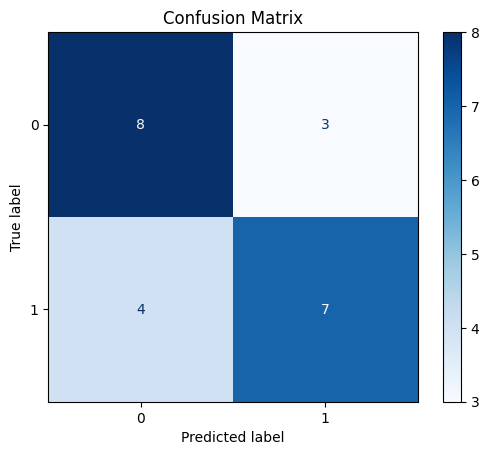

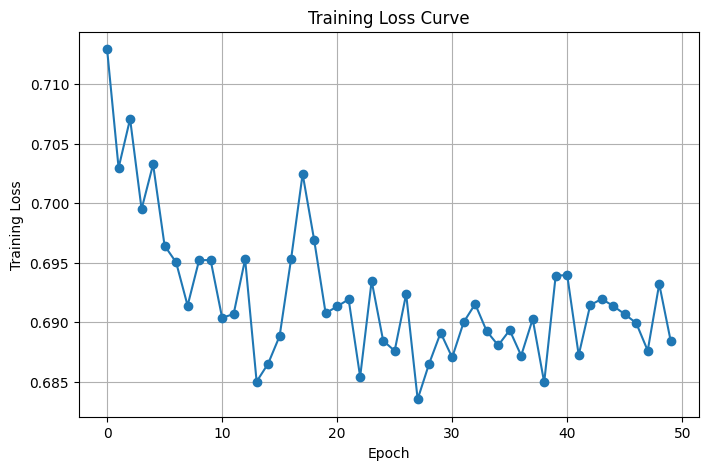

In [ ]:
# Split data into training (80%) and testing (20%) sets
train_features, test_features, train_labels, test_labels = train_test_split(
    features_tensor, labels_tensor, test_size=0.2, random_state=42)

# In your training loop (or before calling the model):
train_features = train_features.float()  # Convert train_features to float32
test_features = test_features.float()  # Also convert test_features to float32

print(f"\nTraining features shape: {train_features.shape}")
print(f"Testing features shape: {test_features.shape}")

# Define model hyperparameters
input_dim = train_features.shape[1]
hidden_dim = 32
num_quantum_params = 4  # for our error-corrected circuit
num_classes = 2  # binary classification

# Initialize the hybrid model with quantum error correction enabled
model = HybridGenomicsLLM(input_dim, hidden_dim, num_quantum_params, num_classes, use_error_correction=True)

print("\n=== Training Hybrid Quantum-Classical Model with Quantum Error Correction ===")
loss_history = train_model(train_features, train_labels, model, num_epochs=50)

print("\n=== Testing Hybrid Quantum-Classical Model with Quantum Error Correction ===")
test_loss, test_accuracy = test_model(test_features, test_labels, model)

# Plot training loss curve
plt.figure(figsize=(8,5))
plt.plot(loss_history, marker='o', linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()


In [ ]:
# Trying with SGD

In [ ]:
def train_model(train_features, train_labels, model, num_epochs=50):
    """
    Train the model using Adam optimizer and cross-entropy loss.
    Records loss values for visualization.
    """
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    loss_history = []

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(train_features)
        loss = criterion(outputs, train_labels)
        loss.backward()
        optimizer.step()
        loss_val = loss.item()
        loss_history.append(loss_val)
        print(f"Epoch {epoch+1}/{num_epochs} Loss: {loss_val:.4f}")

    return loss_history

def test_model(test_features, test_labels, model):
    """
    Evaluate the model on the test set and print loss and accuracy.
    Also display a confusion matrix.
    """
    model.eval()
    criterion = nn.CrossEntropyLoss()
    with torch.no_grad():
        outputs = model(test_features)
        loss = criterion(outputs, test_labels)
        _, predicted = torch.max(outputs, 1)
        correct = (predicted == test_labels).sum().item()
        total = test_labels.size(0)
        accuracy = correct / total
        print(f"\nTest Loss: {loss.item():.4f}")
        print(f"Test Accuracy: {accuracy * 100:.2f}%")

    # Confusion Matrix visualization
    cm = confusion_matrix(test_labels.cpu(), predicted.cpu())
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    return loss.item(), accuracy

# Test training and testing functions with dummy data (optional)


Streaming output truncated to the last 5000 lines.
                            │
(1, 2): ───Rx(0.6π)─────────X────Ry(-0.063π)───M('1_2')───
                         └───┘

Error-Corrected Logical Expectation Values: [0.18, -0.14]
Error-Corrected Quantum Circuit Diagram:
                         ┌───┐
(0, 0): ───Rx(-0.481π)────@──────Ry(0.125π)────M('0_0')───
                          │
(0, 1): ───Rx(-0.481π)────┼@─────Ry(0.125π)────M('0_1')───
                          ││
(0, 2): ───Rx(-0.481π)────┼┼@────Ry(0.125π)────M('0_2')───
                          │││
(1, 0): ───Rx(0.079π)─────X┼┼────Ry(-0.096π)───M('1_0')───
                           ││
(1, 1): ───Rx(0.079π)──────X┼────Ry(-0.096π)───M('1_1')───
                            │
(1, 2): ───Rx(0.079π)───────X────Ry(-0.096π)───M('1_2')───
                         └───┘

Error-Corrected Logical Expectation Values: [0.02, -0.04]
Error-Corrected Quantum Circuit Diagram:
                       ┌───┐
(0, 0): ───Rx(-0.3π)────@──────Ry(0.1

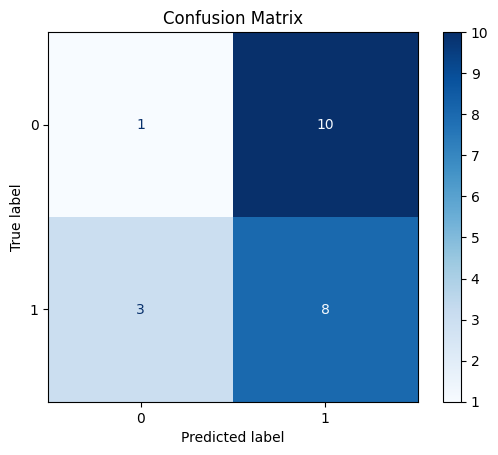

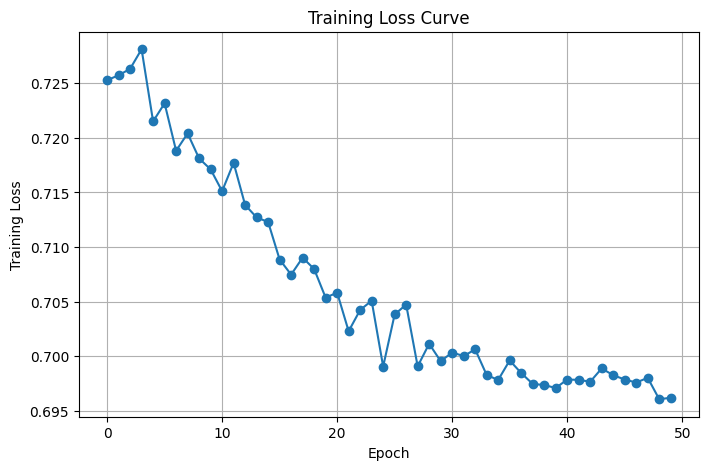

In [ ]:

# Split data into training (80%) and testing (20%) sets
train_features, test_features, train_labels, test_labels = train_test_split(
    features_tensor, labels_tensor, test_size=0.2, random_state=42)

# In your training loop (or before calling the model):
train_features = train_features.float()  # Convert train_features to float32
test_features = test_features.float()  # Also convert test_features to float32

print(f"\nTraining features shape: {train_features.shape}")
print(f"Testing features shape: {test_features.shape}")

# Define model hyperparameters
input_dim = train_features.shape[1]
hidden_dim = 32
num_quantum_params = 4  # for our error-corrected circuit
num_classes = 2  # binary classification

# Initialize the hybrid model with quantum error correction enabled
model = HybridGenomicsLLM(input_dim, hidden_dim, num_quantum_params, num_classes, use_error_correction=True)

print("\n=== Training Hybrid Quantum-Classical Model with Quantum Error Correction ===")
loss_history = train_model(train_features, train_labels, model, num_epochs=50)

print("\n=== Testing Hybrid Quantum-Classical Model with Quantum Error Correction ===")
test_loss, test_accuracy = test_model(test_features, test_labels, model)

# Plot training loss curve
plt.figure(figsize=(8,5))
plt.plot(loss_history, marker='o', linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()


In [ ]:
# Trying with ADAM with more epochs

In [ ]:
def train_model(train_features, train_labels, model, num_epochs=100):
    """
    Train the model using Adam optimizer and cross-entropy loss.
    Records loss values for visualization.
    """
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    loss_history = []

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(train_features)
        loss = criterion(outputs, train_labels)
        loss.backward()
        optimizer.step()
        loss_val = loss.item()
        loss_history.append(loss_val)
        print(f"Epoch {epoch+1}/{num_epochs} Loss: {loss_val:.4f}")

    return loss_history

def test_model(test_features, test_labels, model):
    """
    Evaluate the model on the test set and print loss and accuracy.
    Also display a confusion matrix.
    """
    model.eval()
    criterion = nn.CrossEntropyLoss()
    with torch.no_grad():
        outputs = model(test_features)
        loss = criterion(outputs, test_labels)
        _, predicted = torch.max(outputs, 1)
        correct = (predicted == test_labels).sum().item()
        total = test_labels.size(0)
        accuracy = correct / total
        print(f"\nTest Loss: {loss.item():.4f}")
        print(f"Test Accuracy: {accuracy * 100:.2f}%")

    # Confusion Matrix visualization
    cm = confusion_matrix(test_labels.cpu(), predicted.cpu())
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    return loss.item(), accuracy

# Test training and testing functions with dummy data (optional)


Streaming output truncated to the last 5000 lines.
                           │
(1, 2): ───Rx(0.201π)──────X────Ry(0.292π)───M('1_2')───
                        └───┘

Error-Corrected Logical Expectation Values: [-0.82, 0.54]
Error-Corrected Quantum Circuit Diagram:
                        ┌───┐
(0, 0): ───Rx(0.261π)────@──────Ry(1.73π)────M('0_0')───
                         │
(0, 1): ───Rx(0.261π)────┼@─────Ry(1.73π)────M('0_1')───
                         ││
(0, 2): ───Rx(0.261π)────┼┼@────Ry(1.73π)────M('0_2')───
                         │││
(1, 0): ───Rx(0.201π)────X┼┼────Ry(0.883π)───M('1_0')───
                          ││
(1, 1): ───Rx(0.201π)─────X┼────Ry(0.883π)───M('1_1')───
                           │
(1, 2): ───Rx(0.201π)──────X────Ry(0.883π)───M('1_2')───
                        └───┘

Error-Corrected Logical Expectation Values: [0.66, -0.72]
Error-Corrected Quantum Circuit Diagram:
                        ┌───┐
(0, 0): ───Rx(0.261π)────@──────Ry(1.13π)────M('0_0')───
  

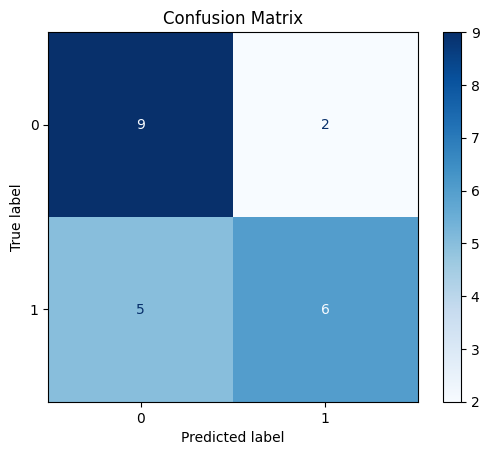

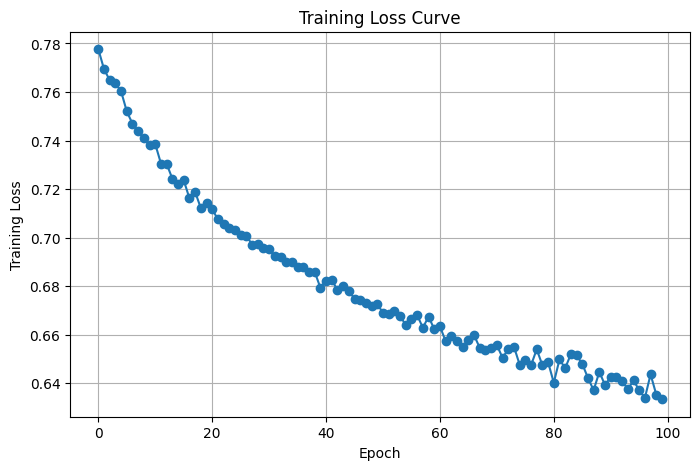

In [ ]:

# Split data into training (80%) and testing (20%) sets
train_features, test_features, train_labels, test_labels = train_test_split(
    features_tensor, labels_tensor, test_size=0.2, random_state=42)

# In your training loop (or before calling the model):
train_features = train_features.float()  # Convert train_features to float32
test_features = test_features.float()  # Also convert test_features to float32

print(f"\nTraining features shape: {train_features.shape}")
print(f"Testing features shape: {test_features.shape}")

# Define model hyperparameters
input_dim = train_features.shape[1]
hidden_dim = 64
num_quantum_params = 8  # for our error-corrected circuit
num_classes = 2  # binary classification

# Initialize the hybrid model with quantum error correction enabled
model = HybridGenomicsLLM(input_dim, hidden_dim, num_quantum_params, num_classes, use_error_correction=True)

print("\n=== Training Hybrid Quantum-Classical Model with Quantum Error Correction ===")
loss_history = train_model(train_features, train_labels, model, num_epochs=100)

print("\n=== Testing Hybrid Quantum-Classical Model with Quantum Error Correction ===")
test_loss, test_accuracy = test_model(test_features, test_labels, model)

# Plot training loss curve
plt.figure(figsize=(8,5))
plt.plot(loss_history, marker='o', linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()
